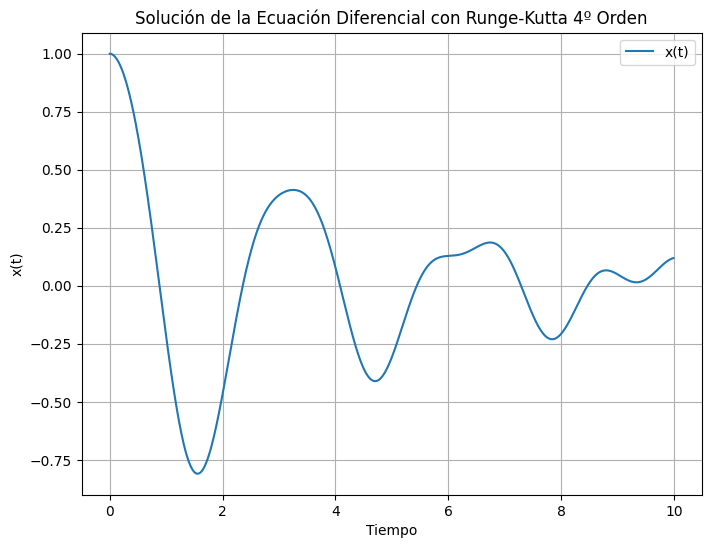

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la ecuación diferencial de segundo orden
def diff_eq(t, x, v):
    return -y*v - w_0**2*x + F_0*np.cos(w*t)/m

# Método de Runge-Kutta de cuarto orden
def runge_kutta(t, h, x, v):
    k1v = h * diff_eq(t, x, v)
    k1x = h * v
    k2v = h * diff_eq(t + h/2, x + k1x/2, v + k1v/2)
    k2x = h * (v + k1v/2)
    k3v = h * diff_eq(t + h/2, x + k2x/2, v + k2v/2)
    k3x = h * (v + k2v/2)
    k4v = h * diff_eq(t + h, x + k3x, v + k3v)
    k4x = h * (v + k3v)

    new_v = v + (k1v + 2*k2v + 2*k3v + k4v)/6
    new_x = x + (k1x + 2*k2x + 2*k3x + k4x)/6

    return new_x, new_v

# Parámetros
F_0 = 1  # N
w_0 = 2  # rad/s
w = 4    # rad/s
y = 0.5  # s^-1
m = 1    # kg

# Condiciones iniciales
x_0 = 1  # x(0)
v_0 = 0  # x'(0)

# Configuración del tiempo
t_0 = 0
t_final = 10
h = 0.01  # tamaño del paso
num_pasos = int((t_final - t_0) / h)

# Listas para almacenar resultados
t_values = np.zeros(num_pasos)
x_values = np.zeros(num_pasos)
v_values = np.zeros(num_pasos)

# Condiciones iniciales
t_values[0] = t_0
x_values[0] = x_0
v_values[0] = v_0

# Resolver la ecuación diferencial usando Runge-Kutta
for i in range(1, num_pasos):
    x_values[i], v_values[i] = runge_kutta(t_values[i - 1], h, x_values[i - 1], v_values[i - 1])
    t_values[i] = t_values[i - 1] + h

# Graficar x(t)
plt.figure(figsize=(8, 6))
plt.plot(t_values, x_values, label='x(t)')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Solución de la Ecuación Diferencial con Runge-Kutta 4º Orden')
plt.legend()
plt.grid(True)
plt.show()